In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [76]:
%run ucrl2.py

<Figure size 432x288 with 0 Axes>

In [77]:
tr[-10:]

[(3999991, 1, 0, 1, 1.0),
 (3999992, 1, 0, 1, 1.0),
 (3999993, 1, 0, 1, 1.0),
 (3999994, 1, 0, 1, 1.0),
 (3999995, 1, 0, 1, 1.0),
 (3999996, 1, 0, 1, 1.0),
 (3999997, 1, 0, 1, 1.0),
 (3999998, 1, 0, 1, 1.0),
 (3999999, 1, 0, 1, 1.0),
 (4000000, 1, 0, 1, 1.0)]

In [43]:
def ucrl2_regret_bound(diameter, n_states, n_actions, delta, t):
    '''Based on Theorem 2 in [JOA10]'''
    return 34 * diameter * n_states * sqrt(n_actions * t * log(t / delta))

In [78]:
total_regret = []
per_step_regret = []
tt = []
opt_avg_reward = 1
acc_regret = 0
for (t, st, ac, next_st, r) in tr:
    acc_regret += opt_avg_reward - r
    total_regret.append(acc_regret)
    per_step_regret.append(acc_regret / t)
    tt.append(t)
    
total_regret = np.asarray(total_regret)
per_step_regret = np.asarray(per_step_regret)
tt = np.asarray(tt)

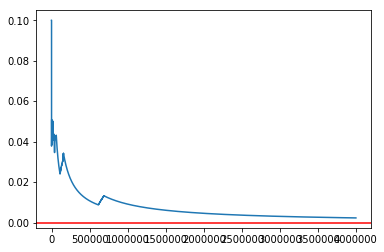

In [79]:
plot(per_step_regret)
axhline(0, c='r')

In [80]:
diameter_regret_bound = ucrl2_regret_bound(10, 2, 2, 0.1, tt)

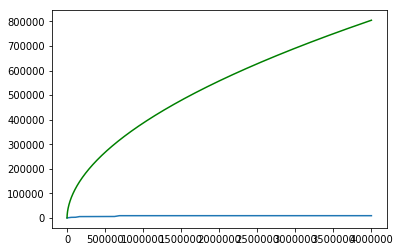

In [88]:
plot(total_regret)
plot(ucrl2_regret_bound(0.1 * 10, 2, 2, 0.1, tt), c='g')
# plot(diameter_regret_bound)

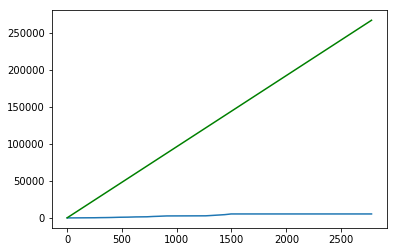

In [86]:
plot(sqrt(tt * log(tt / 0.1))[:500000], total_regret[:500000])
plot(sqrt(tt * log(tt / 0.1))[:500000], ucrl2_regret_bound(0.1 * 10, 2, 2, 0.1, tt)[:500000], c='g')

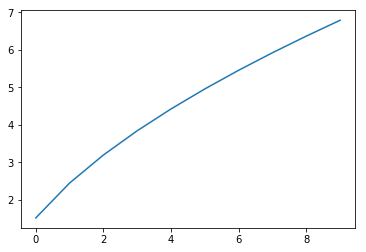

In [93]:
plot(sqrt(tt * log(tt / 0.1))[:10])

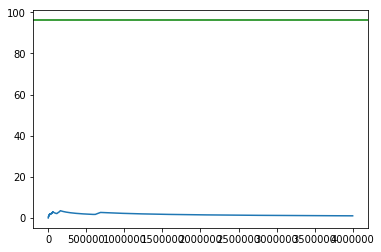

In [95]:
plot(total_regret / sqrt(tt * log(tt / 0.1)))
# axhline(1/0.1 * 2 * sqrt(2), c='r')
axhline(34 * 0.1 * 1/0.1 * 2 * sqrt(2), c='g')

In [39]:
1/0.1 * 2 * sqrt(2)

28.284271247461902

In [53]:
0.1 * 1/0.1 * 2 * sqrt(2)

2.8284271247461903